
In this notebook, we will train cand test two decision tree regressors and a support vector regressor. 

For this, we are using the **Concrete Slump Test Dataset** supplied on the UCI Machine Learning webpage.

As per the **Concrete Slump Test Dataset's** details on the UCI Machine Learning webpage, the data contains **7 input variables (Cement, Slag, Fly ash, Water, SP, Coarse Aggr, and Fine Aggr)**, and **3 output variables (SLUMP, FLOW, and 28-day Compressive Strength(Mpa))**. It is also mentioned that are **no missing attribute values** in this dataset.

All the tasks to be performed are divided into the following sections.
<br>

* **TASK A: Data loading, visualization, and data preparation**
         a1. Reading the data, seeing the first few lines and displaying the features
         a2. Plotting histograms for all the features
         a3. Performing data preparation steps to form feature matrix
         a4. Splitting the dataset into training and test sets
* **TASK B: DT Regressor (raw)**
         b1. Implementing gridsearch for hyperparameter tuning
         b2. Implementing Decision Tree Regressor(raw) and displaying MSE scores
* **TASK C: DT Regressor (Scaled)**
         c1. Implementing feature scaling
         c2. Implementing Decision Tree Regressor(scaled) and displaying MSE scores
* **TASK D: SVR**
         d1. Implementing randomizedsearch hyperparameter tuning
         d2. Implementing Support Vector Regressor, displaying MSE scores
* **TASK E: Comparison, output figure**

Let us peform the tasks.


### TASK A: &emsp; Data loading,  visualization and data preparation
###### a1. &emsp; The below code is to read the data, hard code the column headings, display the features and see the first few lines of the dataset.

In [1]:
import os
import pandas as pd
import numpy as np

cwd = os.getcwd()   #get the current working directory
newpath = os.path.join(cwd,'slump_test.data')  #retrieving the path of the dataset file
df2 = pd.read_csv(newpath, sep=',')    #reading the dataset to the dataframe df
df2.head()     #displaying the first 5 records of the Concrete Slump Test Dataset 

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [2]:
df2.info()   #printing the summary of the dataset
df2.isnull().values.any()   #checking for any null values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   No                                  103 non-null    int64  
 1   Cement                              103 non-null    float64
 2   Slag                                103 non-null    float64
 3   Fly ash                             103 non-null    float64
 4   Water                               103 non-null    float64
 5   SP                                  103 non-null    float64
 6   Coarse Aggr.                        103 non-null    float64
 7   Fine Aggr.                          103 non-null    float64
 8   SLUMP(cm)                           103 non-null    float64
 9   FLOW(cm)                            103 non-null    float64
 10  Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 9.0 KB

False

In [3]:
df2.describe()  #displaying the summary of the numeric attributes 

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,52.000000,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.039417
std,29.877528,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.838232
min,1.000000,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,26.500000,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,52.000000,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,77.500000,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,103.000000,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


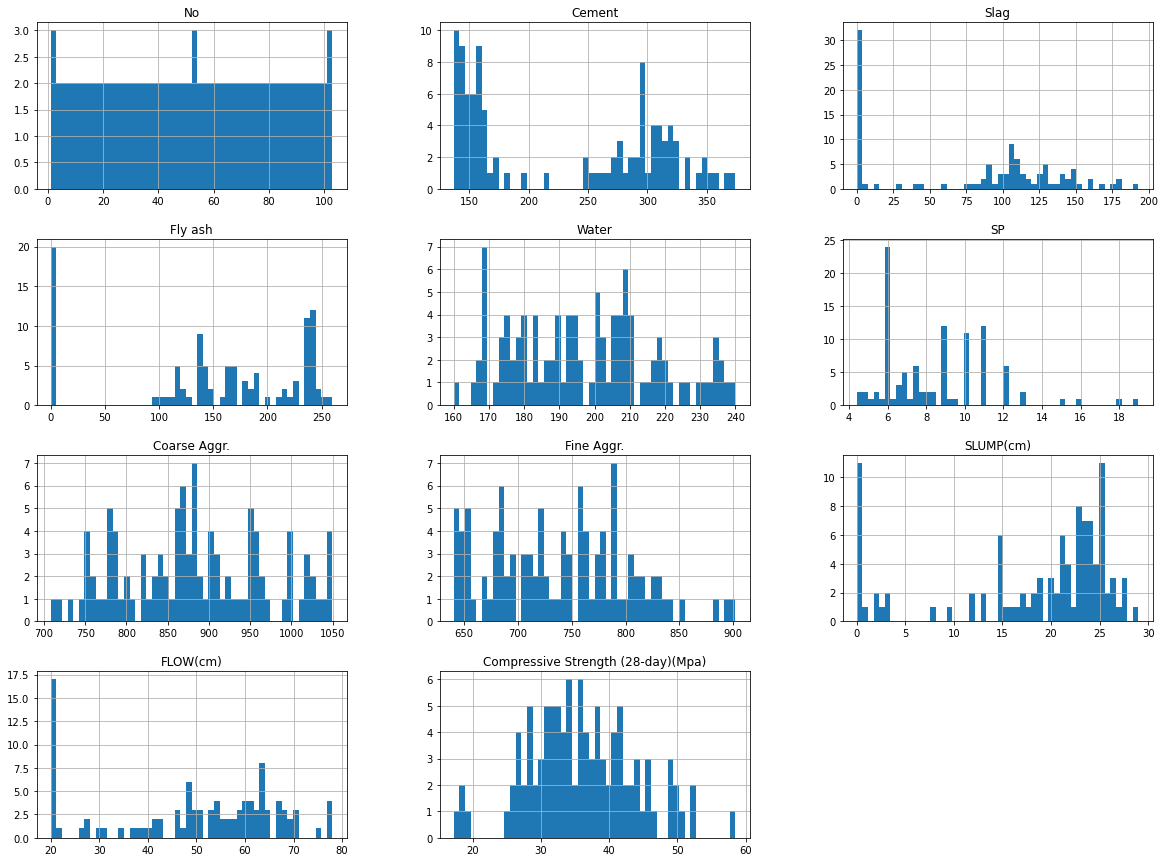

In [4]:
# plotting histograms for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
df2.hist(bins=50, figsize=(20,15))   #plotting histograms for all the numeric columns
plt.show()

From the histograms, we can see that the features **Coarse Aggr, Fine Aggr, and Water** look like normally distributed. We can also see that the feature **Cement** shows some skewness in moderately. The features **Fly ash, Slag, SP and Slump** show high amount of skewness in their distributions.  

###### a4. &emsp; Splitting the dataset into training and test sets 
Before splitting the dataset into training and test sets, we need to prepare input and output vectors out of the dataset. Let us treat the '28-day Compressive Strength(Mpa)' feature as output. This means that this model is going to be trained to predict the concrete compressive strength. To do this, we are treating the features 'Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.', and 'Fine Aggr.' as our input features.  

We now randomly split the data into training and test sets with a 70/30 split. For this, we use train_test_split function from sklearn.model_Selection. We will also find the number of instances in the resulting training and test sets.

In [5]:
#to make this notebook's output identical at every run
np.random.seed(10)

#splitting the dataset into training and test sets with selected features
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse

X2 = df2.iloc[:,1:8].values   #selecting the input features (Cement, Slag, Fly Ash, Water, sp, Coarse Aggr., Fine Aggr.)
y2 = df2.iloc[:,-1].values    #selecting the output feature (28-day compressive strength)

X2_train, X2_test, y2_train, y2_test = train_test_split( X2, y2, test_size=0.3, random_state=10)

print("Training set's shape",X2_train.shape)  #printing the train and test sets shapes to make sure they are having the same number of features.
print("Test set's shape", X2_test.shape)

Training set's shape (72, 7)
Test set's shape (31, 7)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002419F61A310>,
      dtype=object)

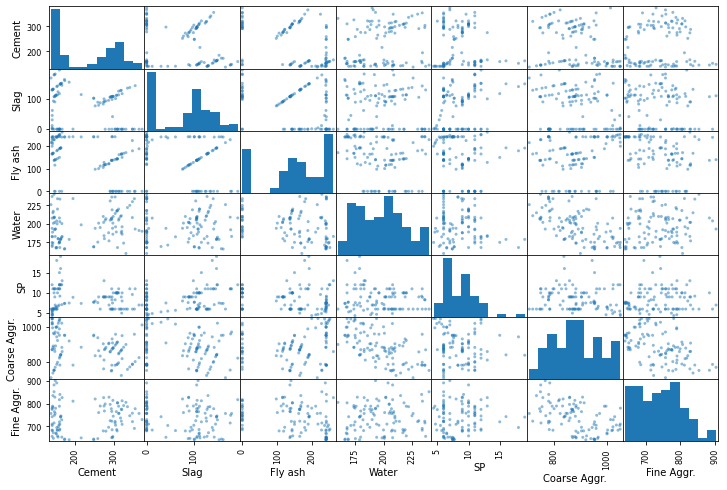

In [6]:
#plotting a scatter matrix for all the feature attributes
from pandas.plotting import scatter_matrix

attributes = ["Cement","Slag","Fly ash","Water","SP","Coarse Aggr.", "Fine Aggr."] # features list
scatter_matrix(df2[attributes],figsize=(12,8))  #plotting a scatter matrix for selected features

### TASK B: DT Regressor (raw)
######  b1& b2. &emsp; Implementing gridsearch for hyperparameter tuning and implementing Decision Tree Regressor(raw) and displaying MSE scores
To reduce the problem of overfitting our model, we need to fine-tune our parameters. In our gridsearch, we are using the parameters **criterion, max_leaf_nodes, and min_samples_split** as our parameter grid.  
* **criterion** is the function to measure the quality of a split. It can be 'mse', 'friedman_mse', 'mae', and 'poisson'. The **default one is 'mse'**- for mean squared error, which is the one we are using here.
* **max_leaf_nodes** is the maximum leaf nodes to grow a tree in best-first fashion. It has an int value, with default as none(means unlimited number of nodes).
* **min_samples_split** is the minimum number of samples required to split an internal node. Can be an int or float. Default is 2. Too high values of min_samples_split can lead to under-fitting.
* **max_features** is the number of features to consider when looking for the best split. It can be an int, float or {'auto','sqrt','log2'}. Default value is none.
In the below code, we are to choose **criterion as mse**. We've experimented with different combinations of values for the parameters **max_leaf_nodes**[5,10,20],[40,50,60], **min_samples_split**[2,5,10],[6,7,8] and **max_features**, and used the combination of parameters which resulted in a best training score. 

In [7]:
# decision tree regressor (raw)
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid ={'criterion':['mse'],'max_leaf_nodes':[70,80,90], 'max_features':['auto','sqrt','log2']}
grid_tree = GridSearchCV(DecisionTreeRegressor(random_state=10), param_grid, cv=3)

#printing the cross validation score for the model
from sklearn.model_selection import cross_val_score
print("\033[1mThe cross validation score of the model is \033[0m",cross_val_score(grid_tree, X2,y2,cv=3))

grid_tree.fit(X2_train,y2_train)  #fitting the model for gridsearch
print("\033[1mThe best parameters are %s with a score of %0.2f\033[0m" %(grid_tree.best_params_, grid_tree.best_score_))   #displaying the best parameter values after tuning

print("train score", grid_tree.score(X2_train,y2_train))
print("test score",grid_tree.score(X2_test,y2_test))

#calculating mean squared error of Decision Tree Regressor (raw)
from sklearn.metrics import mean_squared_error
y2_pred0 = grid_tree.predict(X2_train)
print("Mean squared error for training set is:",mean_squared_error(y2_train, y2_pred0))

#calculating mean squared error of Decision Tree Regressor (raw)
dtc_raw_predict = grid_tree.predict(X2_test)    #predictions on the test set
print("\033[1mMean Squared Error for test set is:\033[0m", mean_squared_error(y2_test,dtc_raw_predict))


The cross validation score of the model is  [0.44785406 0.61185332 0.52377404]
The best parameters are {'criterion': 'mse', 'max_features': 'auto', 'max_leaf_nodes': 70} with a score of 0.66
train score 1.0
test score 0.678800849662198
Mean squared error for training set is: 0.0
Mean Squared Error for test set is: 15.566845161290322


From the above MSE scores, we can see that the training and MSE score of the hypertuned model is 1.0 and 0.0, which is the ideal score. MSE value of 0 indicated that this is the best model. We can see that the MSE score of the model in the test set is 15.5. Let us now check the same with the scaled data.

### TASK C: DT Regressor (Scaled)
###### c1&c2. &emsp; Implementing feature scaling and implementing Decision Tree Regressor(scaled) and displaying MSE scores
We now perform feature scaling on the training set using the StandardScaler transformer from Scikit-Learn.
According to Scikit-Learn, **Standard Scaler** follows the Standard Normal Distribution, i.e., it assumes a normal distribution for data within each feature. The scaling makes the distribution centered around 0, with a standard deviation of 1 and the mean removed.  
Then, we will implement the decision tree regressor on the scaled data and display the Mean Squared Error scores. We are using the same tree(model) which we developed (GridSearchCV) in the previous Decision tree regressor with the raw data.

In [8]:
#applying standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)


In [9]:
# decision tree regressor (scaled)
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

grid_tree.fit(X2_train_scaled,y2_train)  #fitting the model for gridsearch
print("\033[1mThe best parameters are %s with a score of %0.2f\033[0m" %(grid_tree.best_params_, grid_tree.best_score_)) #displaying the best parameter values after tuning

print("train score", grid_tree.score(X2_train_scaled,y2_train))
print("test score",grid_tree.score(X2_test_scaled,y2_test))

y2_pred = grid_tree.predict(X2_train_scaled)
print("Mean squared error for training set is:",mean_squared_error(y2_train, y2_pred))

#calculating mean squared error of Decision Tree Regressor (scaled)
dtc_scaled_predict = grid_tree.predict(X2_test_scaled)    #predictions on the test set
print("\033[1mMean Squared Error for test set is:\033[0m", mean_squared_error(y2_test,dtc_scaled_predict))


The best parameters are {'criterion': 'mse', 'max_features': 'auto', 'max_leaf_nodes': 70} with a score of 0.66
train score 1.0
test score 0.678800849662198
Mean squared error for training set is: 0.0
Mean Squared Error for test set is: 15.566845161290322


From the above scores, we can see that there is no difference in the MSE scores of training, test sets for our model. This means that scaling the data didnot make any difference in the performance of this particular model. 

### TASK D: SVR
###### d1&d2.&emsp; Implementing randomizedsearch hyperparameter tuning and implementing Support Vector Regressor, displaying MSE scores
To reduce the problem of overfitting our model, we need to fine-tune our parameters. In our gridsearch, we are using the parameters **kernel, gamma, and C** as our parameter grid.
* **kernel** specifies the kernel type to be used in the algorithm. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable. Default is rbf.
* **gamma** is the kernel coefficient for 'rbf', 'poly' and 'sigmoid', and can be {'scale','auto'} or float. Default is scale.
* **C** is the regularization parameter and must be strictly positive. It is float. Default is 1.0
In the below code, we are using kernel:[poly,rbf,sigmoid], gamma:[scale,auto], and c:[3,4]. C allows us to assign the weight to slack telling the algorithm how much we care about the error.

In [10]:
#Support vector regressor(scaled)
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

params = {"kernel":['poly','rbf','sigmoid'], "gamma":['scale','auto'], "C": [3, 4]}
rsearch_cv = GridSearchCV(SVR(), params, verbose=2, cv=3)

rsearch_cv.fit(X2_train_scaled, y2_train)   #fitting model for randomizedsearch
print("\033[1mThe best parameters are %s with a score of %0.2f\033[0m" %(rsearch_cv.best_params_, rsearch_cv.best_score_))   #displaying the best parameter values after tuning

print("train score", rsearch_cv.score(X2_train_scaled,y2_train))
print("test score",rsearch_cv.score(X2_test_scaled,y2_test))

y2_pred = rsearch_cv.predict(X2_train_scaled)
print("Mean squared error for training set is:",mean_squared_error(y2_train, y2_pred))

y2_pred1 = rsearch_cv.predict(X2_test_scaled)    #predictions on test set
print("\033[1mMean squared error for test set is:\033[0m",mean_squared_error(y2_test,y2_pred1))


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] C=3, gamma=scale, kernel=poly ...................................
[CV] .................... C=3, gamma=scale, kernel=poly, total=   0.0s
[CV] C=3, gamma=scale, kernel=poly ...................................
[CV] .................... C=3, gamma=scale, kernel=poly, total=   0.0s
[CV] C=3, gamma=scale, kernel=poly ...................................
[CV] .................... C=3, gamma=scale, kernel=poly, total=   0.0s
[CV] C=3, gamma=scale, kernel=rbf ....................................
[CV] ..................... C=3, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=3, gamma=scale, kernel=rbf ....................................
[CV] ..................... C=3, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=3, gamma=scale, kernel=rbf ....................................
[CV] ..................... C=3, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=3, gamma=scale, kernel=sigmoid ................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    0.0s finished


From the above MSE scores, we can see that the training and MSE score of the hypertuned model is 0.92 and 4.99, which is a pretty good score. In general, a MSE value of 0 indicates that this is the best model. We can see that the MSE score of the model in the test set is 9.34. 

### TASK E: Comparison, output figure
We will now plot the results(true vs predicted) of all the three regressors - Decision Tree Regressors(raw and scaled) and the Support Vector Regressor(Scaled) and then compare them.

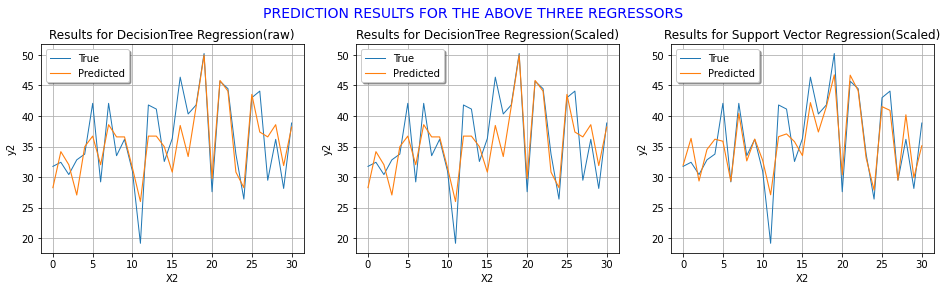

In [11]:
import matplotlib.pyplot as plt

#creating a grid for subplots
fig = plt.figure()
fig.set_figheight(4)
fig.set_figwidth(16)

#plotting subplots
#plot 1:
ax1 = plt.subplot(1,3,1)
ax1.plot(y2_test, linewidth = 1, label = "True")
ax1.plot(dtc_raw_predict, linewidth = 1.1, label = "Predicted")
ax1.set_title("Results for DecisionTree Regression(raw)")
ax1.set_xlabel('X2')
ax1.set_ylabel('y2')
ax1.legend(loc='best', fancybox=True,shadow=True)
ax1.grid(True)

#plot 2:
ax2 = plt.subplot(1,3,2)
ax2.plot(y2_test, linewidth = 1, label = "True")
ax2.plot(dtc_scaled_predict, linewidth = 1.1, label = "Predicted")
ax2.set_title("Results for DecisionTree Regression(Scaled)")
ax2.set_xlabel('X2')
ax2.set_ylabel('y2')
ax2.legend(loc='best', fancybox=True,shadow=True)
ax2.grid(True)

#plot 3:
ax3 = plt.subplot(1,3,3)
ax3.plot(y2_test, linewidth = 1, label = "True")
ax3.plot(y2_pred1, linewidth = 1.1, label = "Predicted")
ax3.set_title("Results for Support Vector Regression(Scaled)")
ax3.set_xlabel('X2')
ax3.set_ylabel('y2')
ax3.legend(loc='best', fancybox=True,shadow=True)
ax3.grid(True)

plt.suptitle("PREDICTION RESULTS FOR THE ABOVE THREE REGRESSORS", fontsize=14, color="blue")
plt.subplots_adjust(top=0.85)
plt.show()

From the above results, we can see that the MSE of the Support vector regressor is nearly half to the score in case of the decision tree regressor. This is also visible from the above true vs predicted values plots.
This means that for this dataset, the **support vector regressor is the best performing model with least Mean Squared Error(MSE)**. But we have to keep in mind that the accuracy of the model increases if we increase the training sample size.  
In some cases, after a certain phase, the accuracy attains a plateau. At this point, even if you increase the training sample size, the performance of the model doesnot increase.  
Both the decision tree and support vector regressors have their own pros and cons. **Support Vector Regressors** outperforms in case of small number of instances, even with a larger feature space, as it does not rely on entire data. The disadvantage of SVR is that sometimes we may not find appropriate kernel.  
With the **decision trees**, the rules are intuitive and the feature interactions are taken into account. The major disadvantage with the decision tress is they are highly biased to the training sets.